<a href="https://colab.research.google.com/github/jsalinas1501/upc_data-mining/blob/master/Examen_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Examen final

Bienvenid@s a su examen final. Es el momento de poner en práctica todos los conceptos que hemos visto a lo largo de la clase. Es momento de ponerse el gorro de *data scientist* y que puedan proponer soluciones basadas en data.

## Primera pregunta (10 puntos)

¡Felicitaciones! Se han graduado exitosamente como Ingenier@s de Sistemas de una de las mejores universidades del Perú, pero como ustedes son unos ávidos buscadores de conocimiento, quieren seguir estudiando y están pensando en postular a las mejores universidades del mundo.

Como ustedes llevaron un curso de analítica avanzada con el mejor profesor del mundo, deciden utilizar esos conocimientos para modelar sus probabilidades de ingresar o no al programa que quieren. Para eso, han recolectado data de los postulantes anteriores y los programas a los cuáles aplicaron.  

In [ ]:
## Librerias iniciales

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

A continuación, se presenta el dataset recopilado y una descripción de las variables:

* GRE Score: Puntaje obtenido en el GRE, un examen estandarizado que es requisito para ingresar a las mejores universidades del mundo. Para mayor información, revisar el siguiente [link](https://www.ets.org/gre.html)
* TOEFL Score: Puntaje obtenido en el Test of English as Foreign Language
* University Rating: Puntaje de la universidad a la que se postuló
* SOP: Puntaje obtenido en el Statement of Purpose, que muestra las motivaciones y el fit que tiene el postulante con el programa
* LOR: Puntaje obtenido en las cartas de recomendación presentadas por los profesores del postulante
* CGPA: Promedio del postulante en su etapa de pregrado
* Research: Flag indicando si el postulante ha realizado alguna investigación relevante en el pregrado
* admit: Variable que se tiene que predecir

In [ ]:
## Carga de dataset inicial, no tienen que modificar nada aquí

url = 'https://raw.githubusercontent.com/aladelca/machine_learning_model/main/archivos_trabajo/adm_data.csv'
COLUMNS = ['GRE Score', 'TOEFL Score','University Rating', 'SOP', 'LOR ','CGPA','Research','admit']
data = pd.read_csv(url)
data['admit'] = np.where(data['Chance of Admit ']>0.8,1,0)
data = data[COLUMNS]
data = data.rename(columns = {'LOR ':'LOR'})
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,0
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,0
4,314,103,2,2.0,3.0,8.21,0,0


Lo que tienen que hacer ahora es entrenar un modelo que busque predecir si el postulante ingresará al programa al que ha postulado. El algoritmo final lo escogen ustedes pero la solución que presenten debe tener lo siguiente:

* KFold validation con K = 5
* Comparar al menos 4 algoritmos diferentes
* Dentro de los 4 algoritmos anteriores, sí o sí tienen que utilizar `KNeighborsClassifier` con el parámetro `n_neighbors = 7`
* Para cada uno de los algoritmos utilizados, presentar el `accuracy_score`, `recall_score`, matriz de confusión y curva ROC, indicando el `auc_score`
* Con la solución final (ustedes deciden cuál es la mejor, en función a las técnicas que utilicen), hagan una predicción acerca de si ustedes ingresarán al programa escogido. Recuerden convertir su promedio de pregrado a una escala del 1 al 10 para la variable CGPA; para las demás variables, hagan una suposición de cuánto podrían obtener en cada uno de los items.

In [ ]:
### Escribe tu código aquí. Pueden usar todas las celdas que necesiten, sin embargo, deberán estar ordenadas y comentadas
### para que su profesor pueda entender lo que han hecho

## Definimos las variables para el entrenamiento y cual es el target
VARS = ['GRE Score','TOEFL Score','University Rating','SOP','LOR','CGPA','Research']
TARGET = ['admit']

x = data[VARS]
y = data[TARGET]

In [ ]:
### Train KFold validation con K=5

from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

kfold = KFold(n_splits=5, shuffle=True, random_state=102)

# Inicializa el clasificador KNeighborsClassifier y un pipeline para escalar las características
classifier_kn = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=7))

# Inicializa el clasificador LogisticRegression y un pipeline para escalar las características
classifier_lr = make_pipeline(StandardScaler(), LogisticRegression())

# Inicializa el clasificador RandomForestClassifier y un pipeline para escalar las características
classifier_rf = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators = 500))

# Inicializa el clasificador GradientBoostingClassifier y un pipeline para escalar las características
classifier_boost = make_pipeline(StandardScaler(), GradientBoostingClassifier())

# Realiza la validación cruzada y predicciones
y_pred_kn = cross_val_predict(classifier_kn, x, y, cv=kfold)
y_pred_lr = cross_val_predict(classifier_lr, x, y, cv=kfold)
y_pred_rf = cross_val_predict(classifier_rf, x, y, cv=kfold)
y_pred_boost = cross_val_predict(classifier_boost, x, y, cv=kfold)

In [ ]:
# Calcula y muestra métricas de evaluación
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, roc_curve, auc

accuracy_kn = accuracy_score(y, y_pred_kn)
recall_kn = recall_score(y, y_pred_kn)
conf_matrix_kn = confusion_matrix(y, y_pred_kn)

accuracy_lr = accuracy_score(y, y_pred_lr)
recall_lr = recall_score(y, y_pred_lr)
conf_matrix_lr = confusion_matrix(y, y_pred_lr)

accuracy_rf = accuracy_score(y, y_pred_rf)
recall_rf = recall_score(y, y_pred_rf)
conf_matrix_rf = confusion_matrix(y, y_pred_rf)

accuracy_boost = accuracy_score(y, y_pred_boost)
recall_boost = recall_score(y, y_pred_boost)
conf_matrix_boost = confusion_matrix(y, y_pred_boost)

print('*** KNeighbors values ***')
print(f'Accuracy Score: {accuracy_kn:.4f}')
print(f'Recall Score: {recall_kn:.4f}')
print('Confusion Matrix:')
print(conf_matrix_kn)
print('***************************')
print('*** LogisticRegression values ***')
print(f'Accuracy Score: {accuracy_lr:.4f}')
print(f'Recall Score: {recall_lr:.4f}')
print('Confusion Matrix:')
print(conf_matrix_lr)
print('***************************')
print('*** RandomForestClassifier values ***')
print(f'Accuracy Score: {accuracy_rf:.4f}')
print(f'Recall Score: {recall_rf:.4f}')
print('Confusion Matrix:')
print(conf_matrix_rf)
print('***************************')
print('*** GradientBoostingClassifier values ***')
print(f'Accuracy Score: {accuracy_boost:.4f}')
print(f'Recall Score: {recall_boost:.4f}')
print('Confusion Matrix:')
print(conf_matrix_boost)

*** KNeighbors values ***
Accuracy Score: 0.9200
Recall Score: 0.8205
Confusion Matrix:
[[272  11]
 [ 21  96]]
***************************
*** LogisticRegression values ***
Accuracy Score: 0.9225
Recall Score: 0.8718
Confusion Matrix:
[[267  16]
 [ 15 102]]
***************************
*** RandomForestClassifier values ***
Accuracy Score: 0.9300
Recall Score: 0.8632
Confusion Matrix:
[[271  12]
 [ 16 101]]
***************************
*** GradientBoostingClassifier values ***
Accuracy Score: 0.9175
Recall Score: 0.8291
Confusion Matrix:
[[270  13]
 [ 20  97]]


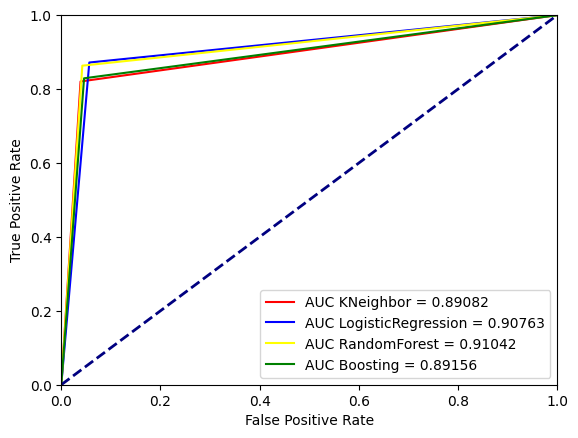

In [33]:
# Calcula y muestra la curva ROC con el área bajo la curva (AUC)
import matplotlib.pyplot as plt

fpr_kn, tpr_kn, thresholds_kn = roc_curve(y, y_pred_kn)
roc_auc_kn = auc(fpr_kn, tpr_kn)

fpr_lr, tpr_lr, thresholds_lr = roc_curve(y, y_pred_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y, y_pred_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_boost, tpr_boost, thresholds_boost = roc_curve(y, y_pred_boost)
roc_auc_boost = auc(fpr_boost, tpr_boost)

plt.plot(fpr_kn, tpr_kn, 'red', label = 'AUC KNeighbor = %0.5f' % roc_auc_kn)
plt.plot(fpr_lr, tpr_lr, 'blue', label = 'AUC LogisticRegression = %0.5f' % roc_auc_lr)
plt.plot(fpr_rf, tpr_rf, 'yellow', label = 'AUC RandomForest = %0.5f' % roc_auc_rf)
plt.plot(fpr_boost, tpr_boost, 'green', label = 'AUC Boosting = %0.5f' % roc_auc_boost)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# Utilizando el modelo mas preciso LogisticRegression, predice si seremos admitidos

# Predice con los valores proporcionados
my_VARS = pd.DataFrame({'GRE Score': [330], 'TOEFL Score': [110], 'University Ranking': [3],
                         'SOP': [4.0], 'LOR': [4.0], 'CGPA': [7.5], 'Research': [1]})
my_target = pd.DataFrame({'admit': [1]})

my_x = data[my_VARS]
my_y = data[my_target]

my_pred = cross_val_predict(classifier_lr, my_x, my_y, cv=kfold)

print(f"Predicción para los valores proporcionados: {my_pred}")


ValueError: ignored

## Segunda pregunta

Como no todo en la vida es estudio, después de haber estudiado tanto para su examen, ustedes quieren relajarse, salir a tomar algo, ir al cine, etc.; sin embargo, se han dado cuenta que están sol@s y quieren encontrar a su *significant other* para poder realizar todas esas actividades con el/ella. Para eso, como todo en la vida desde ahora, utilizarán analítica.

Como ustedes nunca han usado Tinder ni Bumble, su profe ha recolectado para ustedes un dataset con información acerca de estos aplicativos de citas. El dataset lo podrán encontrar en el aula virtual, en la sección de Examen Final.

Pueden encontrar más detalle de las variables [aquí](https://www.kaggle.com/datasets/andrewmvd/okcupid-profiles)

In [32]:
### Importar el dataset aquí
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('okcupid_profiles.csv')
data.head()

FileNotFoundError: ignored

Lo que van a hacer, claramente, es un sistema de recomendación para que ustedes encuentren a su pareja ideal. Pueden utilizar cualquier variable que consideren relevante del dataset. La calificación va a estar en función a qué tan buena está la recomendación, y para eso, tienen que encontrar a los 3 mejores matchs para ustedes. Las recomendaciones, obviamente, tienen que tener sentido (si ustedes son hombres heterosexuales, lo más lógico sería que las recomendaciones sean mujeres heterosexuales). Para evaluar la lógica de las recomendaciones, tienen que indicar claramente su perfil y qué es lo que están buscando:

1. Sexo: Masculino
2. Orientación sexual: Heterosexual
3. Descripción de vida: "I'm a man that is looking to hang out for a while without any kind of commitment"

Si no se sienten cómodos compartiendo su información, pueden inventarla sin ningún problema.

El sistema recomendador tiene que mostrarme los 3 mejores match (que hagan sentido)

In [ ]:
### Escriban su código aquí
from sklearn.feature_extraction.text import CountVectorizer
import re
from unidecode import unidecode
from sklearn.metrics.pairwise import cosine_similarity
def limpiar_texto(texto):
  texto = texto.lower()
  texto = unidecode(texto)
  texto = re.sub(r'[^a-zA-Z\s]', '', texto)
  return texto
data['full_essay'] = pd.concat([data['essay0'], data['essay1'], data['essay2'],data['essay3'],data['essay4'],data['essay5'],data['essay6'],data['essay7'],data['essay8'],data['essay9']], axis=1)
data['essay_limpio'] = data['full_essay'].apply(limpiar_texto)
vect = CountVectorizer()
a = pd.DataFrame(vect.fit_transform(data['essay_limpio']).toarray(), columns = vect.get_feature_names_out())
matriz = pd.DataFrame(cosine_similarity(a,a), index = data['status'].values, columns = data['status'].values)
def recomendacion(status, n ):
  return matriz.loc[status,:].sort_values(ascending = False)[1:n+1]

recomendacion("Looking for a single woman", 10)